# Demo: Heating of A Steel Bar

This notebook provide a demo case on the application of the heat conduction solver.
<br>

## Geometry & Computational Grid
In this case, we will consider a bar made of steel of length L = 0.01 m.  We will use N=51 nodes for this bar. As you can see, the grid spacing, dx will be $L/(N-1)=0.0002$ m.

## Solution & Time Stepping
The bar is exposed to the heat flux for 10 seconds. So we will set 50 time steps with a time step size of 0.2 second.
Also, we need to set parameters for Newton's iteration. All the parameters can be found in below.

## Initial & Boundary Conditions
The initial temperature of the bar is assumed to be a constant of 298 K. At the front (x=0 m), a fixed heat flux (qdot) of 750000 W/m$^2$ is applied and at the end (x=L m), an adiabatic BC (qdot=0) is applied.
## Material Properties
|  Property  |   Value   |   Unit   |
|------|------|------|
|   Density  | 7850| kg/m$^3$     |
|  Conductivity | 60.5 | W/(mK)|
|  Specific Heat | 434 | J/(mK)

First, import parameter module in order to get a Pandas series containing all the parameters.

In [15]:
import os
os.chdir('/home/bogdanov1/bachproject/bachproject/') 

In [2]:
from IPython.utils import io
import parameter as para
%matplotlib widget
with io.capture_output() as captured:
    model=NN_training.train_model()


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name     | Type    | Params
-------------------------------------
0 | fcIn     | Linear  | 3.8 K 
1 | fcOut    | Linear  | 62    
2 | mse_loss | MSELoss | 0     
-------------------------------------
3.9 K     Trainable params
0         Non-trainable params
3.9 K     Total params
0.015     Total estimated model params size (MB)
IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.i

In [19]:
import importlib
import parameter as para
importlib.reload(para)   #In order to apply changes in the module 
paras = para.main(model)

We can print out the paras object to see all the parameters.

As you can see, there are a lot of parameters to solve a PDE. 
It is noted that you can alter any parameter you want.
<br>
Now we have the parameters, now let's import the heatConduction solver.

<module 'heatConduction' from '/home/bogdanov1/bachproject/bachproject/PyTorch/heatConduction.py'>

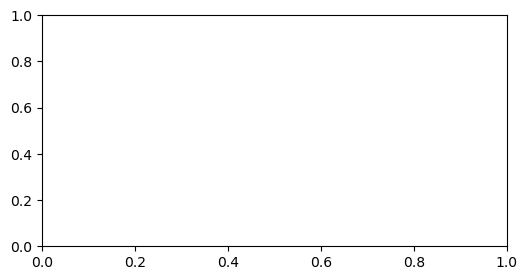

In [20]:
import heatConduction as hc
importlib.reload(hc)

The heatConduction package contains necessary components to solve the PDEs. To just use it as a solver, simply passing the generated parameters to the solve function and execute. <br>
The solution process will be displayed as, time step, physical time, number of Newton's iteration and residual.
For details of the solution strategy, please review any numerical analysis text book.

$\frac{dt}{dx^2}~\frac{(3/2*ne[i]*Kb)}{k\alpha T^{2.5}}$

In [21]:
results, cache, alphas, betas = hc.solve(paras)

 Heat Conduction Solver
 [Step] [Pysical Time] [Iteration] [Residue] [minT] [maxT] [E]


/home/bogdanov1/bachproject/bachproject/PyTorch/heatConduction.py:80: RuntimeWarning: invalid value encountered in power
  Jacobian[i][i+1] = -(1/dx**2)*(k[i+1] * alphas[i+1]*T[i+1]**betas[i+1])
/home/bogdanov1/bachproject/bachproject/PyTorch/heatConduction.py:84: RuntimeWarning: invalid value encountered in power
  F[i] = (3/2*ne[i])*(T[i] - T0[i])*Kb/dt - ((alphas[i]*k[i]/(betas[i]+1))*T[i+1]**(betas[i]+1)\
/home/bogdanov1/bachproject/bachproject/PyTorch/heatConduction.py:83: RuntimeWarning: invalid value encountered in power
  *T[i]**betas[i]
/home/bogdanov1/bachproject/bachproject/PyTorch/heatConduction.py:85: RuntimeWarning: invalid value encountered in power
  -((alphas[i-1]*k[i-1]/(betas[i-1]+1)) + (alphas[i]*k[i]/(betas[i]+1)))*T[i]**(betas[i]+1)\
/home/bogdanov1/bachproject/bachproject/PyTorch/heatConduction.py:81: RuntimeWarning: invalid value encountered in power
  Jacobian[i][i-1] = -(1/dx**2)*(k[i-1] * alphas[i-1]*T[i-1]**betas[i-1])
/home/bogdanov1/bachproject/bachproject

 [   1 ]  [   0.00 ]  [ 100 ]  [      NAN ]  [      NAN ]  [      NAN ]  [      NAN ]
 [   2 ]  [   0.00 ]  [ 100 ]  [      NAN ]  [      NAN ]  [      NAN ]  [      NAN ]
 [   3 ]  [   0.00 ]  [ 100 ]  [      NAN ]  [      NAN ]  [      NAN ]  [      NAN ]
 [   4 ]  [   0.00 ]  [ 100 ]  [      NAN ]  [      NAN ]  [      NAN ]  [      NAN ]


KeyboardInterrupt: 

The solve output the results and a cache. The results is a numpy array consist of evolution of each time step over the domain. The cache file is a Python dictionary consists of some variables used by debugging. <br>
In order to view the results, import the postprocessing package and preprocess the results. <br>
The preprocess transform the numpy array into a Pandas DataFrame, with index as grid locations and columns as timings.

In [6]:
import postprocessing as pp
importlib.reload(pp)
T = pp.preprocess(paras, results)

In [7]:
import pandas as pd
alpha3d=pd.DataFrame(alphas, columns=T.columns)
beta3d=pd.DataFrame(betas, columns=T.columns)

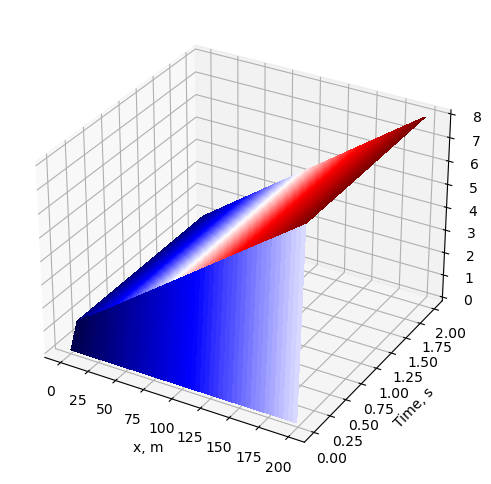

In [22]:
pp.evolutionField(alpha3d)

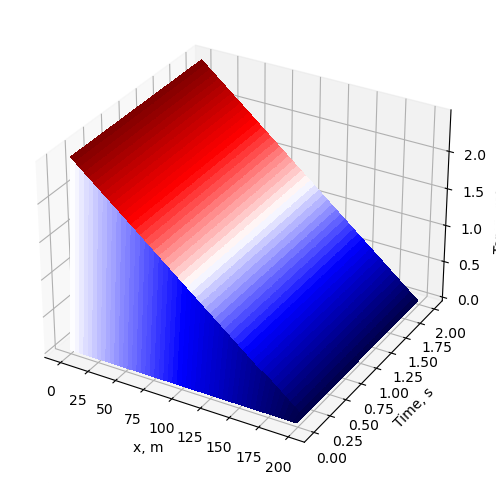

In [11]:
pp.evolutionField(beta3d)

The first plot is the evolution field in both time and space. We can view the results in a 3D contour plot by just passing the processed T to the function evolutionField(). <br>
It can be seen that the temperature over the var is increasing as time elapses.

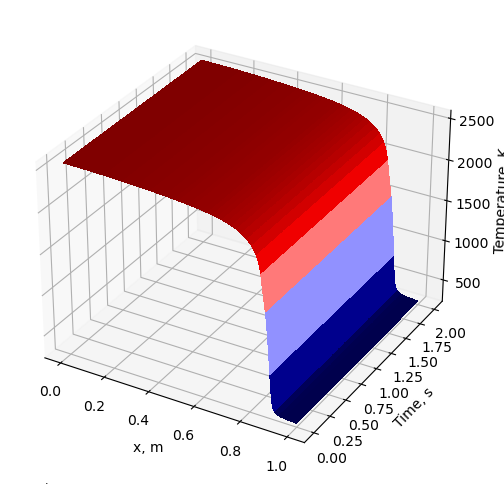

In [12]:
pp.evolutionField(T[T.columns])

We can also check the temperature evolution for some specific locations, as there are thermal couples. <br>
Simply create a list of locations you want to check, and then pass the T and positions into the thermalCouplePlot() function.

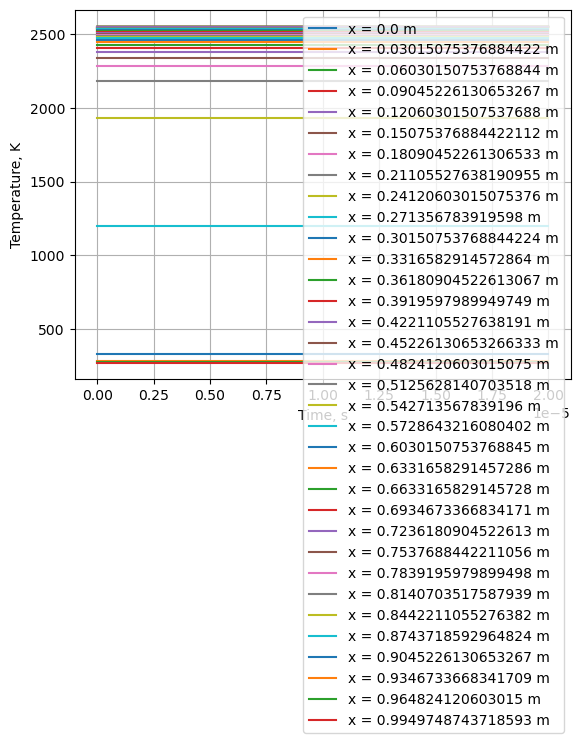

In [13]:
positions = T.index[::int(len(T)*3e-2)]
pp.thermalCouplePlot(T, positions)

We can futher check how the temperature is distributed over the domain at different times. Simply create a list of timings you want, and pass the T and times to the temperatureDistribution functions.

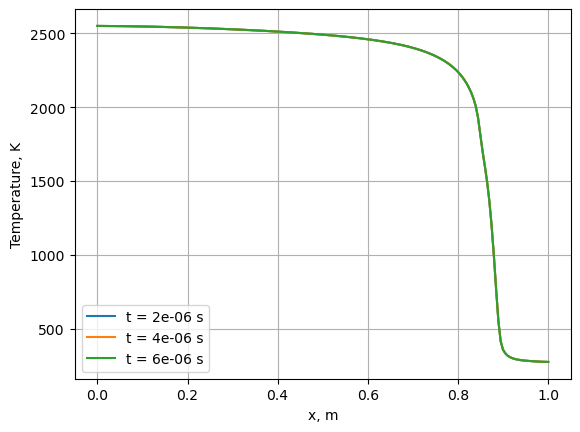

In [14]:
times = T.columns[::int(len(T.columns)/10)][1:4]
pp.temperatureDistribution(T, times)

Thanks for viewing this notebook and enjoy!